# **Salaries for Sanfrancisco Employees**
## **Overview**
###  ● EmployeeName: Name of the employee.
●  **JobTitle** : Title of the job.

● **BasePay**: Base salary pay.

● **OvertimePay**: Pay for overtime work.

● **OtherPay**: Any other types of compensation.

● **Benefits**: Benefits provided to the employee.

● **TotalPay**: The total pay without benefits.

● **TotalPayBenefits**: Total pay with benefits included.

● **Year**: The year of the payroll record.**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/user/Desktop/sanfrancs.csv")
df

C:\Users\user\AppData\Local\Temp\ipykernel_17908\1534457698.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Users/user/Desktop/sanfrancs.csv")


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018


# **Understanding Data**

In [71]:
df.nunique()

EmployeeName        130283
JobTitle              2286
BasePay             238165
OvertimePay         141441
OtherPay            167391
Benefits            242085
TotalPay            291072
TotalPayBenefits    299391
Year                     8
dtype: int64

In [72]:
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

In [73]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [74]:
df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]

In [75]:
df.describe()

,TotalPay,TotalPayBenefits,Year
count,312173.000000,312173.000000,312173.000000
mean,78981.625208,101141.490339,2014.625246
std,53158.372642,66409.363813,2.291859
min,0.010000,0.010000,2011.000000
25%,39340.140000,49563.520000,2013.000000
50%,75031.820000,100172.370000,2015.000000
75%,111519.740000,142506.390000,2017.000000
max,592394.340000,712802.360000,2018.000000


# **Understanding Data by visualization**

In [80]:
job_salary =df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)
job_salary

JobTitle
Chief Investment Officer                          496183.260000
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Physician Administrator, DPH                      371433.086667
Managing Director                                 360485.330000
Chief, Fire Department                            334602.164286
Assistant Chief of Police                         315458.160000
Gen Mgr, Public Trnsp Dept                        311300.658571
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
Administrator, DPH                                300149.340000
Name: TotalPay, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_9912\356960123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.values, y=job_salary.index,


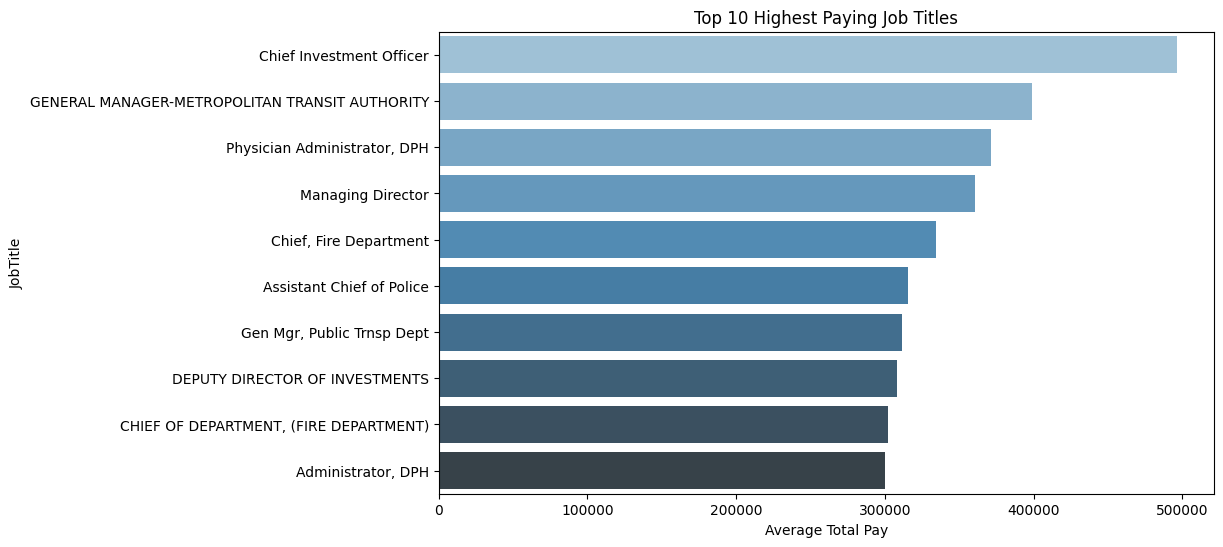

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=job_salary.values, y=job_salary.index,
palette='Blues_d')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Total Pay')
plt.show()

# **Summary of Findings**
### *This graph shows that chief investment officer earns the most and dominate the list and most top hiigh paying job roles show leadership position,so we can conclude that ledership roles earn the most*

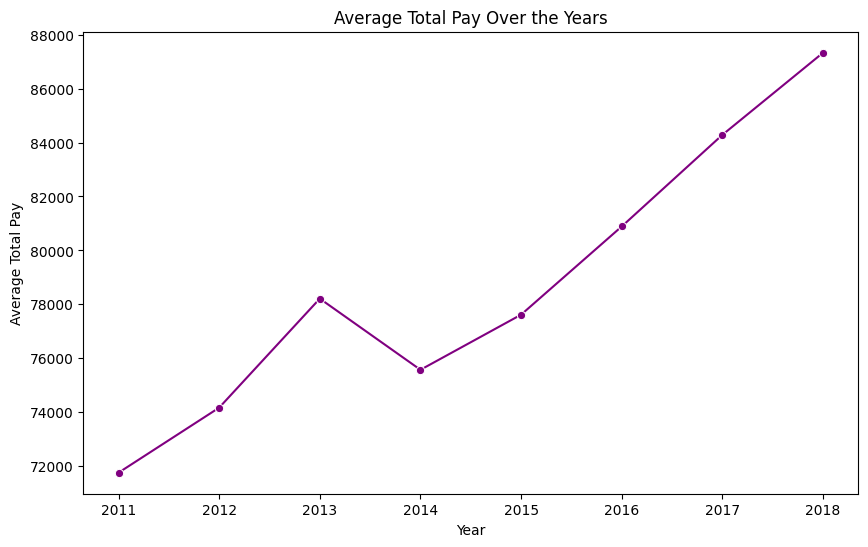

In [17]:
pay_over_years = df.groupby('Year')['TotalPay'].mean()
# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=pay_over_years.index, y=pay_over_years.values,
marker='o', color='purple')
plt.title('Average Total Pay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Total Pay')
plt.show()

## *The line graph sows a rise of trend from year 2011 to 2018 except in tne year 2014 which may caused due to some problem but overall a steady growth suggest that pay was staedily increaded overtime*

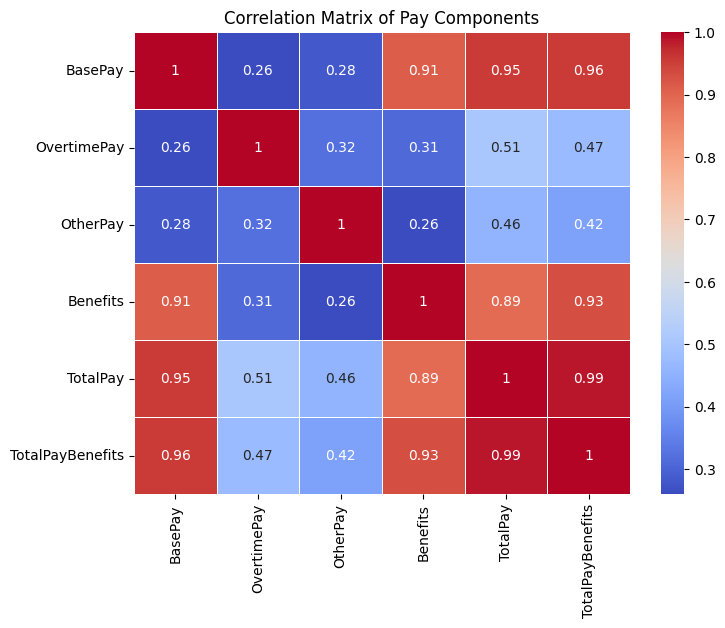

In [20]:
plt.figure(figsize=(8,6))
corr_matrix = df[['BasePay', 'OvertimePay', 'OtherPay',
                  'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Pay Components')
plt.show()

## *Strong positive correlations exist between BasePay, Benefits, and TotalPay, meaning employees with higher base salaries also tend to get higher benefits and total compensation. OvertimePay and OtherPay are less correlated, showing they vary independently across employees.*

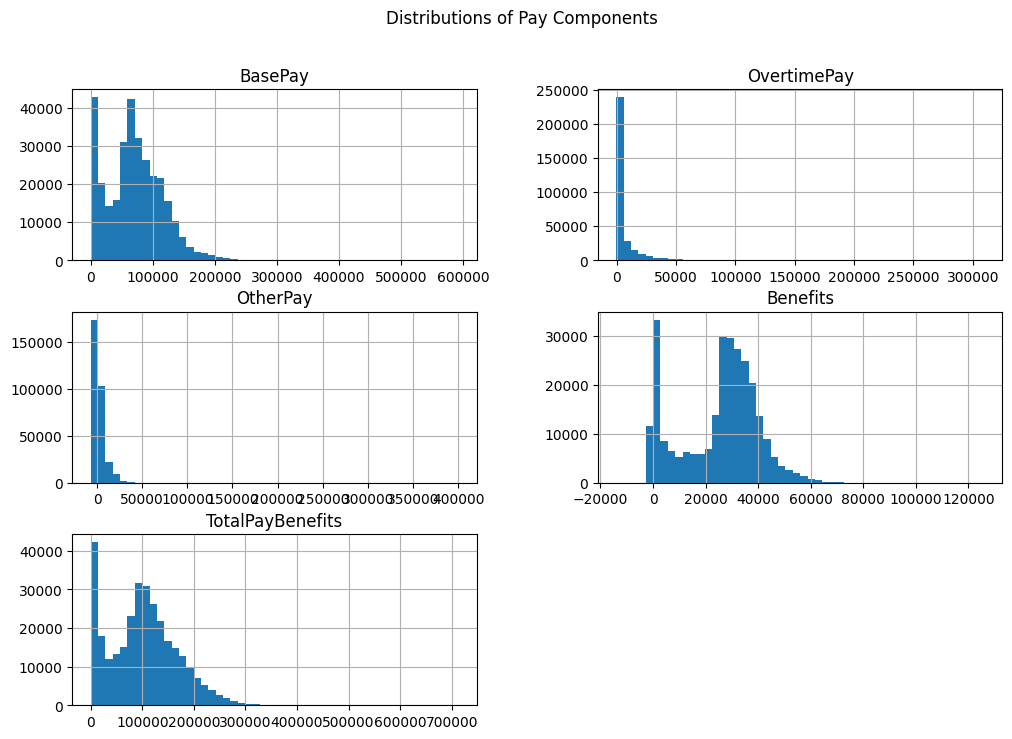

In [21]:
df[['BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits']].hist(bins=50, figsize=(12,8))
plt.suptitle("Distributions of Pay Components")
plt.show()

## *We may conclude from these graphs that most earn an average income while only a few earn very high*

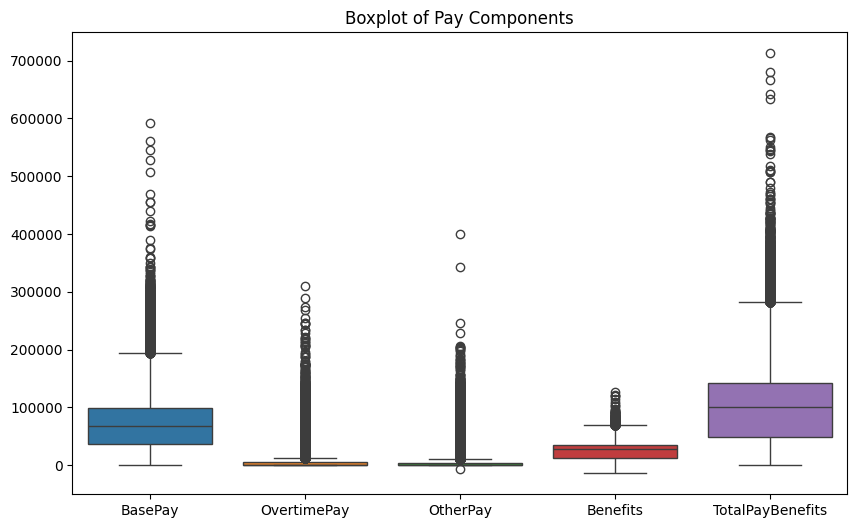

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['BasePay','OvertimePay','OtherPay','Benefits','TotalPayBenefits']])
plt.title("Boxplot of Pay Components")
plt.show()

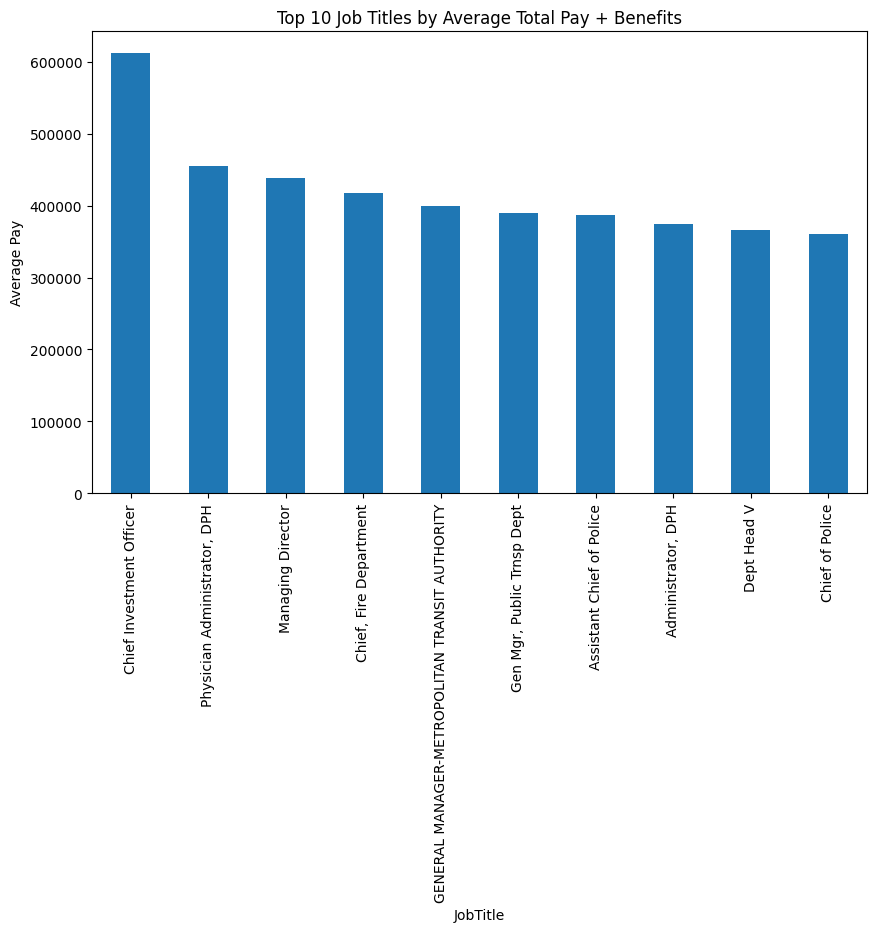

In [23]:
top_jobs = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values(ascending=False).head(10)
top_jobs.plot(kind='bar', figsize=(10,6))
plt.title("Top 10 Job Titles by Average Total Pay + Benefits")
plt.ylabel("Average Pay")
plt.show()

## we can conclude that average pay for Chief Investment Officer is very high compared with other proffesions while CHief of Police earns low average

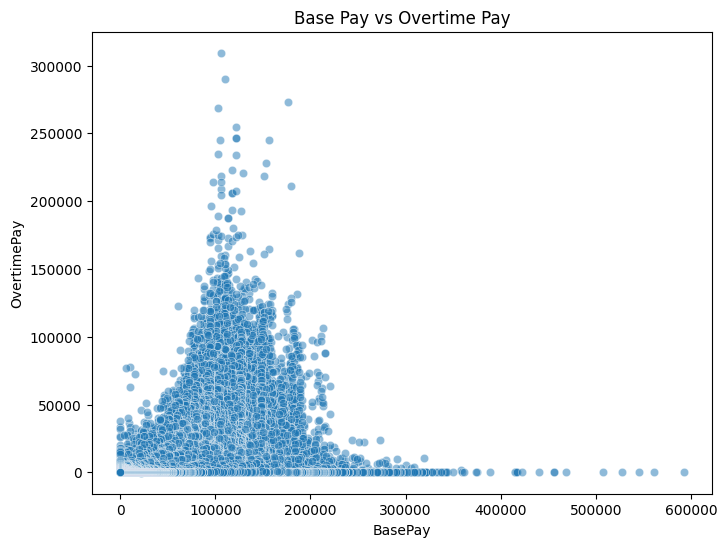

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BasePay', y='OvertimePay', data=df, alpha=0.5)
plt.title("Base Pay vs Overtime Pay")
plt.show()

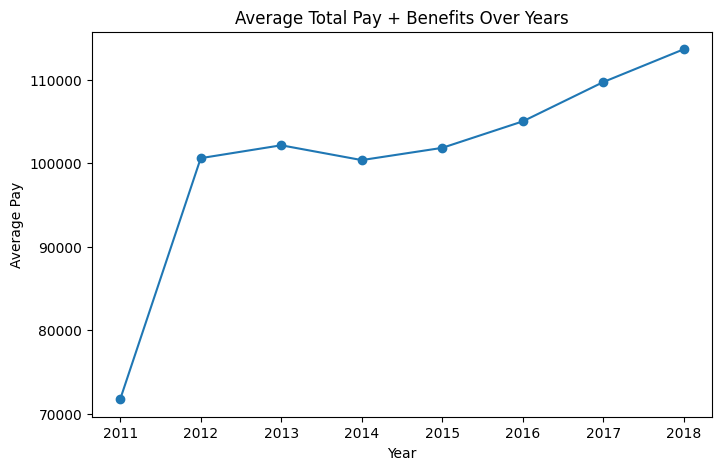

In [25]:
avg_year = df.groupby('Year')['TotalPayBenefits'].mean()
avg_year.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Average Total Pay + Benefits Over Years")
plt.ylabel("Average Pay")
plt.show()

## *This graph suggest that over time the average pay has increasd steadily over time*

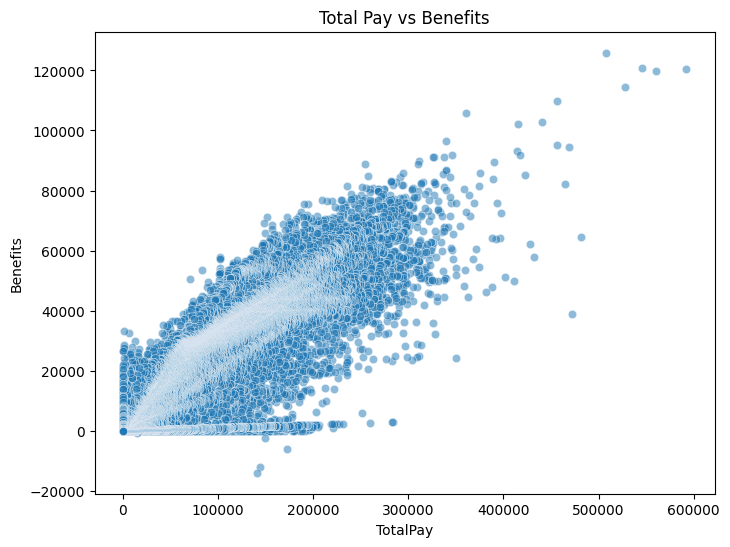

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TotalPay', y='Benefits', data=df, alpha=0.5)
plt.title("Total Pay vs Benefits")
plt.show()

## *From this plot we can conclude that as TotalPay increases, Benefits also rise. However, the spread shows some employees with very high TotalPay but relatively low benefits*

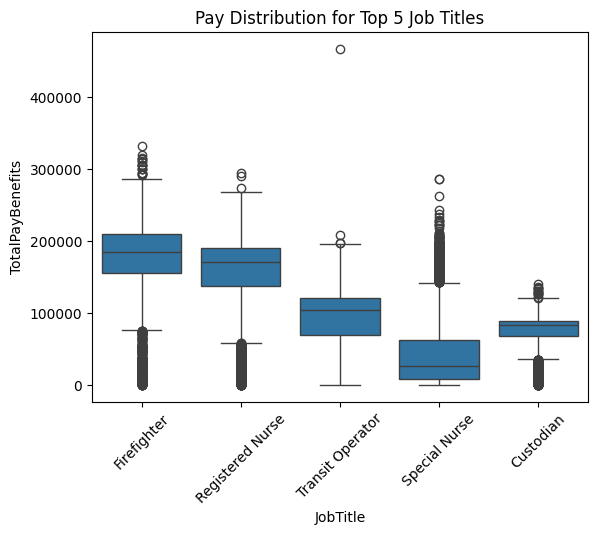

In [78]:
top_titles = df['JobTitle'].value_counts().head(5).index
sns.boxplot(x='JobTitle', y='TotalPayBenefits', data=df[df['JobTitle'].isin(top_titles)])
plt.xticks(rotation=45)
plt.title("Pay Distribution for Top 5 Job Titles")
plt.show()

## Firefighters and Registered Nurses have relatively high median pay with wide interquartile ranges, suggesting that salaries in these roles vary significantly Special Nurses have a wide range of salaries but a lower overall median, while Custodians earn the least with a more compact distribution.

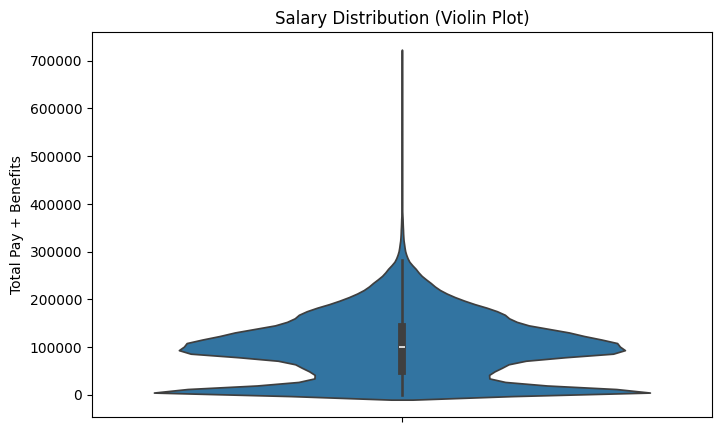

In [81]:
plt.figure(figsize=(8,5))
sns.violinplot(y=df['TotalPayBenefits'])
plt.title("Salary Distribution (Violin Plot)")
plt.ylabel("Total Pay + Benefits")
plt.show()

## Most employees fall into a mid-range pay band, as indicated by the wider bulge in the middle of the plot. WE can also conclude from an upward strectch a smaller group of employees earn significantly higher pay.

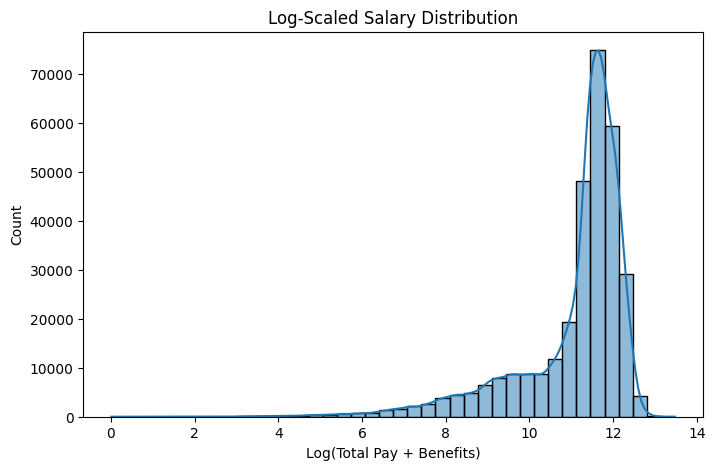

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['TotalPayBenefits']), bins=40, kde=True)
plt.title("Log-Scaled Salary Distribution")
plt.xlabel("Log(Total Pay + Benefits)")
plt.show()

## This graph clearly demonstrates that while a few employees earn very high amounts, the majority are distributed more evenly across lower-to-mid ranges.

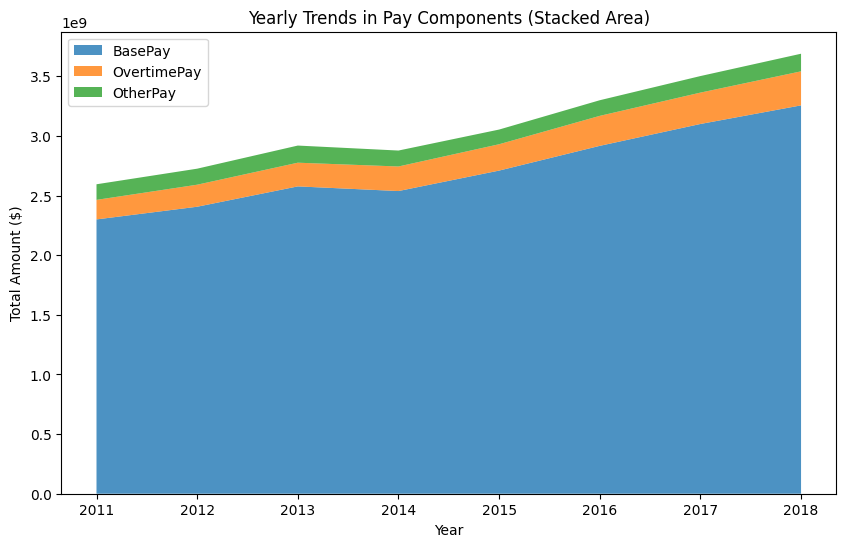

In [83]:
yearly = df.groupby('Year')[['BasePay','OvertimePay','OtherPay']].sum()

plt.figure(figsize=(10,6))
plt.stackplot(yearly.index, 
              yearly['BasePay'], yearly['OvertimePay'], yearly['OtherPay'], 
              labels=['BasePay','OvertimePay','OtherPay'], alpha=0.8)
plt.legend(loc='upper left')
plt.title("Yearly Trends in Pay Components (Stacked Area)")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.show()

## This graph illustrates how the type of payemnets have changed over the years,it shows that as time passes basepay made the majority and overtimePay and OtherPay are much smaller in proportion but also show gradual growth.There is a consitent increase in salary.

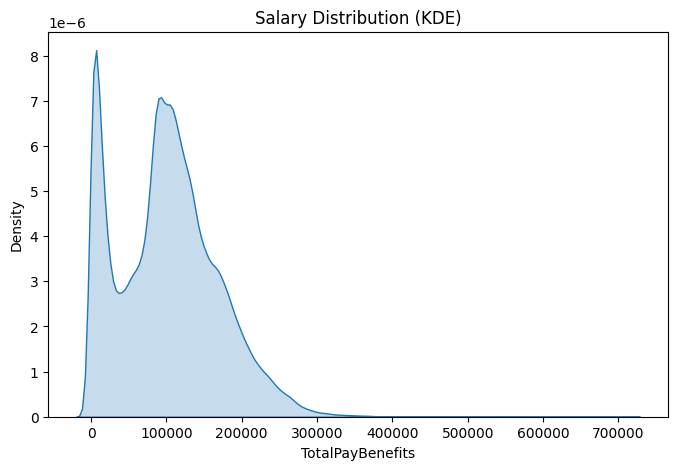

In [5]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['TotalPayBenefits'], fill=True)
plt.title("Salary Distribution (KDE)")
plt.show()

## We can easily conclude that high paying roles are relatively rare and most employees earn same amount.